In [1]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
#Filter Results
grouped_results = study_results.groupby("Mouse ID")
filtered_results = grouped_results.filter(lambda x: x["Timepoint"].count() == 10)
filtered_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
5,h246,0,45.0,0
6,p189,0,45.0,0
11,b559,0,45.0,0
12,y260,0,45.0,0


In [4]:
#Combine the data
combined_results = filtered_results.merge(mouse_metadata, on="Mouse ID")
combined_results.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [5]:
#Group data by every timepoint per regiment
grouped_regiment = combined_results.groupby(["Drug Regimen", "Timepoint"])
grouped_regiment.count().head()

Mouse ID  Tumor Volume (mm3)  Metastatic Sites  Sex  \
Drug Regimen Timepoint                                                        
Capomulin    0                21                  21                21   21   
             5                21                  21                21   21   
             10               21                  21                21   21   
             15               21                  21                21   21   
             20               21                  21                21   21   

                        Age_months  Weight (g)  
Drug Regimen Timepoint                          
Capomulin    0                  21          21  
             5                  21          21  
             10                 21          21  
             15                 21          21  
             20                 21          21

In [6]:
#Set up a dataframe holding stats for each timepoint per regiment
tumor_med = grouped_regiment["Tumor Volume (mm3)"].median()
tumor_avg = grouped_regiment["Tumor Volume (mm3)"].mean()
tumor_sem = grouped_regiment["Tumor Volume (mm3)"].sem()
tumor_std = grouped_regiment["Tumor Volume (mm3)"].std()
tumor_var = grouped_regiment["Tumor Volume (mm3)"].var()
grouped_regiment_df = pd.DataFrame({"Median":tumor_med, "Average":tumor_avg, "SEM":tumor_sem, "Stand. Dev.":tumor_std, 
                                    "Variance":tumor_var})

#Define function to create stat summary for each regimen
def regimen_stat(regimen):
    return grouped_regiment_df.loc[regimen, :]

#For loop to print all the stat sums for all the regimens
regimens = combined_results["Drug Regimen"].unique()
for regimen in regimens:
    print(regimen)
    print(regimen_stat(str(regimen)))

Capomulin
              Median    Average       SEM  Stand. Dev.   Variance
Timepoint                                                        
0          45.000000  45.000000  0.000000     0.000000   0.000000
5          45.622381  44.638812  0.373530     1.711731   2.930025
10         43.421014  43.288693  0.707142     3.240531  10.501043
15         42.283665  42.241369  0.811862     3.720418  13.841513
20         40.716428  41.046149  0.846435     3.878850  15.045480
25         40.156413  39.719733  0.895478     4.103597  16.839507
30         39.352792  38.803875  0.979400     4.488174  20.143704
35         37.967644  37.772247  1.102608     5.052785  25.530639
40         36.843898  36.958001  1.223608     5.607278  31.441568
45         37.311846  36.236114  1.223977     5.608969  31.460537
Ketapril
              Median    Average       SEM  Stand. Dev.   Variance
Timepoint                                                        
0          45.000000  45.000000  0.000000     0.000000   

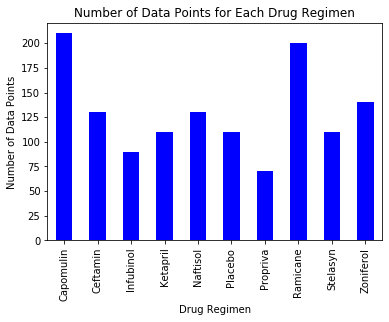

In [7]:
#Bar Plots of Data Points
regimen_groups = combined_results.groupby("Drug Regimen")

#Using Pandas
regimen_counts = regimen_groups["Mouse ID"].count()
regimen_counts.plot(kind="bar", title="Number of Data Points for Each Drug Regimen", color="b")
plt.ylabel("Number of Data Points")
plt.savefig("Images/Barplots/barplot_pandas.png", bbox_inches="tight")
plt.show()

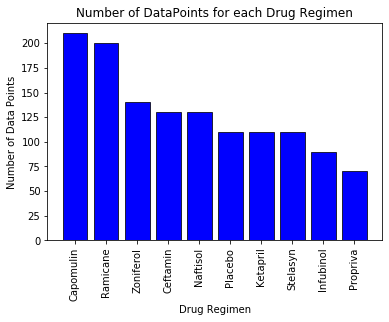

In [8]:
#Bar plots using MatPlotLib
counts = combined_results["Drug Regimen"].value_counts().to_list()
regimens2 = combined_results["Drug Regimen"].value_counts().keys().to_list()
plt.bar(regimens2, counts, color="b", edgecolor="black", linewidth=0.75)
plt.title("Number of DataPoints for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation="vertical")
plt.savefig("Images/Barplots/barplot_matplotlib.png", bbox_inches="tight")
plt.show()

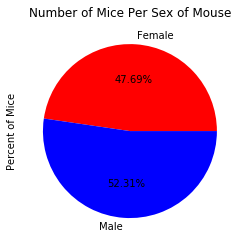

In [9]:
#Pie Plots
sex_grouped = combined_results.groupby("Sex")

#Using Pandas
sex_grouped["Mouse ID"].count().plot.pie(autopct = "%.2f%%", colors=["red", "blue"])
plt.ylabel("Percent of Mice")
plt.title("Number of Mice Per Sex of Mouse")
plt.savefig("Images/Piecharts/piechart_pandas.png", bbox_inches="tight")
plt.show()

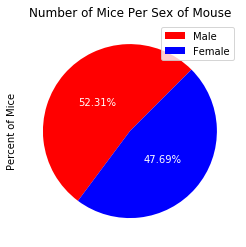

In [10]:
#Using MatPlotLib
mouse_counts = combined_results["Sex"].value_counts().to_list()
sexes = combined_results["Sex"].value_counts().keys().to_list()
colors = ["red", "blue"]
plt.pie(mouse_counts, labels=sexes, colors=colors, autopct = "%.2f%%", pctdistance=.5, startangle=45, 
        textprops={'color':'white'})
plt.legend()
plt.title("Number of Mice Per Sex of Mouse")
plt.ylabel("Percent of Mice")
plt.savefig("Images/Piecharts/piechart_matplotlib", bbox_inches='tight')
plt.show()

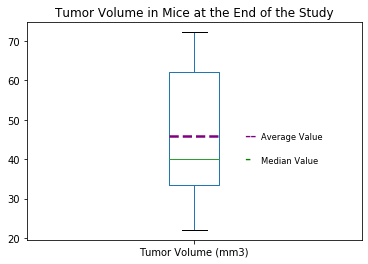

In [11]:
#Quartiles, Outliers, and Boxplots

#IQR and quartiles of 4 most promising treatments
#Find 4 most promising treatments
#Create dictionary of final tumor size averages
final_tumor_avg = {}
def final_tumor_avg_append(regimen):
    final_tumor_avg[regimen] = (grouped_regiment_df.loc[(regimen, 45), "Average"])
for regimen in regimens:
    final_tumor_avg_append(regimen)
#Reduce dictionary to the smallest end tumor sizes
def find_four_min(dictionary):
    while len(dictionary) > 4:
        max_key = max(final_tumor_avg, key=lambda key: final_tumor_avg[key])
        del dictionary[max_key]
    return dictionary
#Determine the 4 best treatments
find_four_min(final_tumor_avg)
best_regimens = final_tumor_avg.keys()
best_regimens
#Filter results to final results for all mice in these regimens
final_result = combined_results.loc[combined_results["Timepoint"] == 45]
final_results_cap = final_result.loc[combined_results["Drug Regimen"] == "Capomulin"]
final_results_inf = final_result.loc[combined_results["Drug Regimen"] == "Infubinol"]
final_results_ram = final_result.loc[combined_results["Drug Regimen"] == "Ramicane"]
final_results_cef = final_result.loc[combined_results["Drug Regimen"] == "Ceftamin"]
final_results = [final_results_cap, final_results_inf, final_results_ram, final_results_cef]
final_results_df = pd.concat(final_results)
#Box Plot of the final data
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')
final_results_df["Tumor Volume (mm3)"].plot(kind="box", title="Tumor Volume in Mice at the End of the Study", showmeans=True,
                                            meanline=True,meanprops=meanlineprops)
plt.text(1.15, 45, '--', color='purple', weight='roman', size='xx-large')
plt.text(1.2, 45, 'Average Value', color='black', weight='roman', size='small')
plt.text(1.15, 39, '-', color='green', weight='roman', size='xx-large')
plt.text(1.2, 39, 'Median Value', color='black', weight='roman', size='small')
plt.savefig("Images/Boxplots/boxplot.png")
plt.show()

In [12]:
#Show IQR and determine outliers
#Find IQR
iqr = st.iqr(final_results_df["Tumor Volume (mm3)"])
print("The iqr for the final Tumor Volume is " + str(round(iqr, 2)) + " mm^3")
#Find Upper/Lower bounds
q1 = np.percentile(final_results_df["Tumor Volume (mm3)"], 25)
q3 = np.percentile(final_results_df["Tumor Volume (mm3)"], 75)
upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)
#Determine Outliers
outliers = []
for tumor in final_results_df["Tumor Volume (mm3)"]:
    if tumor > upper_bound or tumor < lower_bound:
        outliers.append(tumor)

if len(outliers) == 0:
    print("There are no outliers in this data")
else:
    print("The outlier values are " + str(outliers))

The iqr for the final Tumor Volume is 28.66 mm^3
There are no outliers in this data


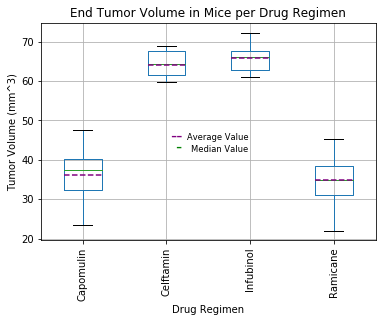

In [13]:
#Box plots for each individual regimen
regimen_grouped = final_results_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen")
meanlineprops = dict(linestyle='--', linewidth=1.5, color='purple')
regimen_grouped.boxplot(subplots=False, rot="vertical", showmeans=True, meanline=True, meanprops=meanlineprops)
plt.xticks([1, 2, 3, 4], ["Capomulin", "Celftamin", "Infubinol", "Ramicane"])
plt.title("End Tumor Volume in Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm^3)")
plt.text(2.05, 45, '--', color='purple', weight='roman', size='xx-large')
plt.text(2.25, 45, 'Average Value', color='black', weight='roman', size='small')
plt.text(2.1, 42, '-', color='green', weight='roman', size='xx-large')
plt.text(2.3, 42, 'Median Value', color='black', weight='roman', size='small')
plt.savefig("Images/Boxplots/tumor_volume_by_regimen.png", bbox_inches='tight')
plt.show()